In [1]:
import sys
from packaging import version
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
# Verificando versoes dos pacotes utilizados
%reload_ext watermark
%watermark -a "Daniel Henrique" --iversions

Author: Daniel Henrique

sklearn   : 1.1.2
packaging : 21.3
pandas    : 1.4.4
sys       : 3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:30:19) [MSC v.1929 64 bit (AMD64)]
numpy     : 1.23.3
matplotlib: 3.5.3



In [4]:
from pathlib import Path
import tarfile
import urllib.request



# Baixando arquivo zip 
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            #Extraindo tgz
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))


housing = load_housing_data()

# Estrutura dos Dados do Dataset Housing

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Informacoes do Dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Tabela de ccontagem para ocean_proximity
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# Descrição dos dados, esse comando detecta para colunas numericas
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

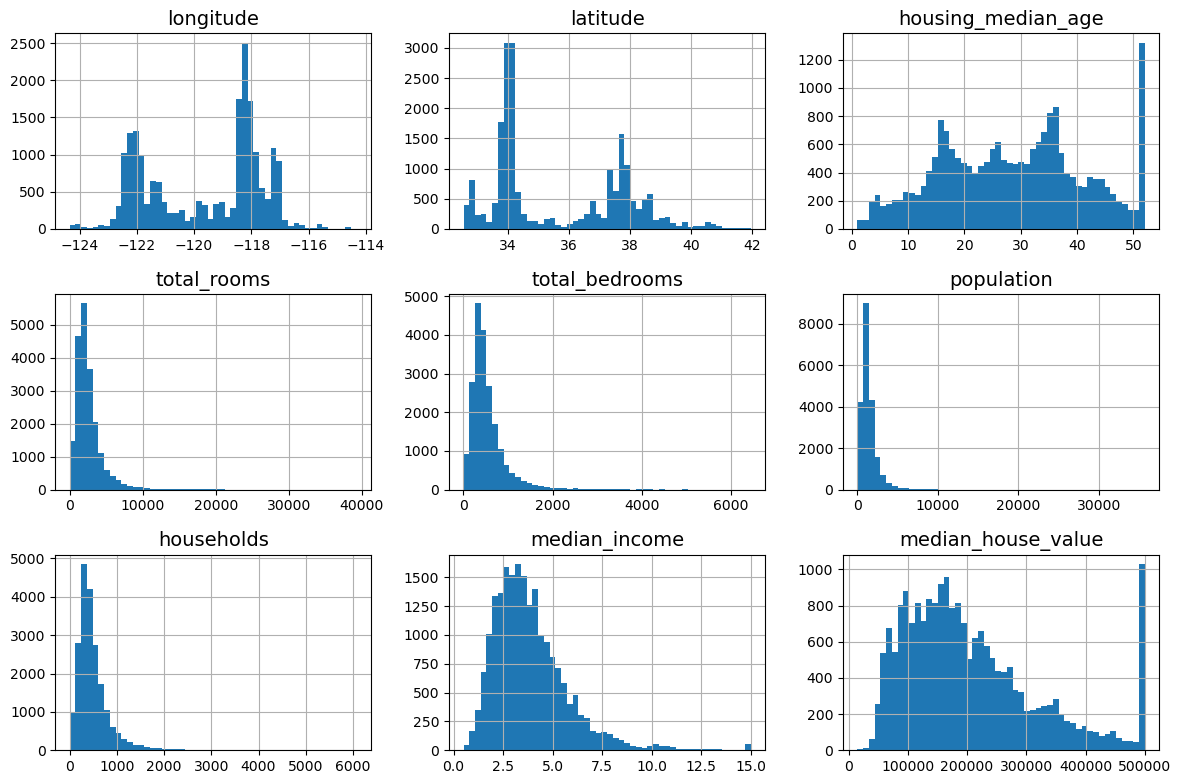

In [10]:
import matplotlib.pyplot as plt

# Exibindo Histogramas das variaveis numericas
housing.hist(bins=50, figsize=(12,8))
save_fig("attribute_histogram_plots")
plt.show()

O que temos de insight com esses histogramas.

1. Primeiro, o atributo de renda mediana não parece ser expresso em dólares americanos (USD). Depois de verificar com a equipe que coletou os dados, você é informado de que os dados foram dimensionados e limitados a 15 (na verdade, 15,0001) para rendas médias mais altas e a 0,5 (na verdade, 0,4999) para rendas medianas mais altas e em 0,5 (na verdade, 0,4999) para rendas medianas mais baixas. Os números representam aproximadamente dezenas de milhares de dólares (por exemplo, 3 na verdade significa cerca de US$ 30.000). Trabalhar com atributos pré-processados ​​é comum em Machine Learning e não é necessariamente um problema, mas você deve tentar entender como os dados foram computados.
2. A idade média da habitação e o valor médio da habitação também foram limitados. Este último pode ser um problema sério, pois é seu atributo de destino (seus rótulos). Seus algoritmos de Machine Learning podem aprender que os preços nunca ultrapassam esse limite. Você precisa verificar com sua equipe do cliente (a equipe que usará a saída do seu sistema) para ver se isso é um problema ou não. Se eles disserem que precisam de previsões precisas, mesmo além de US$ 500.000, você terá duas opções:
    * Colete etiquetas apropriadas para os distritos cujos rótulos foram tampados.
    * Remova esses distritos do conjunto de treinamento (e também do conjunto de teste, já que seu sistema não deve ser avaliado de forma inadequada se prever valores além de US$ 500.000).
3. Esses atributos têm escalas muito diferentes. Discutiremos isso mais adiante neste capítulo, quando explorarmos o dimensionamento de recursos
4. Finalmente, muitos histogramas são enviesados ​​para a direita: eles se estendem muito mais à direita da mediana do que à esquerda. Isso pode tornar um pouco mais difícil para alguns algoritmos de Machine Learning detectar padrões. Tentaremos transformar esses atributos mais tarde para ter distribuições mais simétricas e em forma de sino.



In [11]:
def shuffle_and_split_data(data, test_ratio):
    #selecionando indices aleatorios
    shuffled_indices = np.random.permutation(len(data))

    #selecionando tamanho do dataset
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


In [13]:
# setando seed para produzir mesmo resultado em outras execucoes 
np.random.seed(42)

Infelizmente, o conjunto de dados não possui uma coluna ID. A solução mais simples é usar o índice de linha como o ID.
Para ter uma divisão de treinamento/teste estável mesmo após a atualização do conjunto de dados, uma solução comum é usar o identificador de cada instância para decidir se ela deve ou não entrar no conjunto de teste (supondo que as instâncias tenham um identificador exclusivo e imutável). Por exemplo, você pode calcular um hash do identificador de cada instância e colocar essa instância no conjunto de teste se o hash for menor ou igual a 20% do valor máximo de hash. Isso garante que o conjunto de teste permaneça consistente em várias execuções, mesmo se você atualizar o conjunto de dados. O novo conjunto de teste conterá 20% das novas instâncias, mas não conterá nenhuma instância que estava anteriormente no conjunto de treinamento.

In [14]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

A latitude e longitude de um distrito são garantidamente estáveis ​​por alguns milhões de anos, então você pode combiná-los em um ID como este

In [16]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

O Scikit-Learn fornece algumas funções para dividir conjuntos de dados em vários subconjuntos de várias maneiras. A função mais simples é train_test_split(), que faz praticamente a mesma coisa que a função shuffle_and_split_data() que definimos anteriormente, com alguns recursos adicionais. Primeiro, há um parâmetro random_state que permite definir a semente do gerador aleatório. Segundo, você pode passar vários conjuntos de dados com um número idêntico de linhas e ele os dividirá nos mesmos índices (isso é muito útil, por exemplo, se você tiver um DataFrame separado para rótulos):

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Para encontrar a probabilidade de que uma amostra aleatória de 1.000 pessoas contenha menos de 48,5% de mulheres ou mais de 53,5% de mulheres quando a proporção feminina da população for 51,1%, usamos a distribuição binomial. O método cdf() da distribuição binomial nos dá a probabilidade de que o número de fêmeas seja igual ou menor que o valor dado.


In [18]:
# extra code – mostra como calcular a probabilidade de 10,7% de obter uma amostra ruim
from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929909


Se você preferir simulações em vez de matemática, veja como você pode obter aproximadamente o mesmo resultado:

In [19]:
np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

In [20]:
housing["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [21]:
#Criando coluna com ranges
# [0 a 1.5 label == 1] [1.5 a 3.0 label == 2] [3.0 a 4.5 label == 3] [4.5 a 6 label == 4]  [6 a infinito label == 5] 
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

print(housing["income_cat"].value_counts().sort_index())

housing.head()

1     822
2    6581
3    7236
4    3639
5    2362
Name: income_cat, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


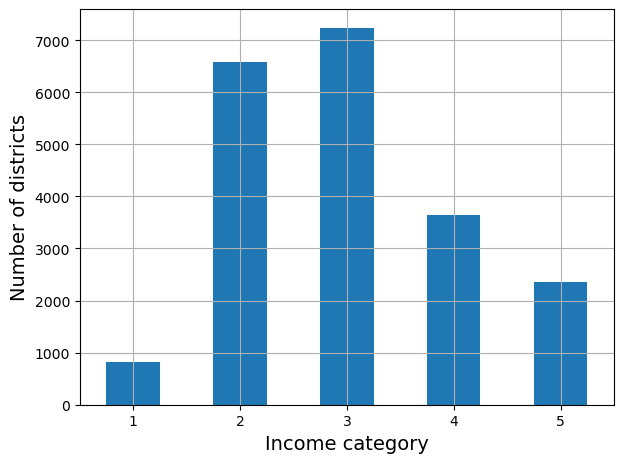

In [22]:
housing["income_cat"].value_counts().sort_index().plot(kind="bar", rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")  
plt.show()


In [23]:
#O código a seguir gera 10 divisões estratificadas diferentes do mesmo conjunto de dados:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])


#Usando apenas uma divisao
strat_train_set, strat_test_set = strat_splits[0]

In [24]:
# Como a amostragem estratificada é bastante comum, há uma maneira mais curta de obter uma única divisão usando a train_test_split() função com o stratif como argumento
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [25]:
(strat_test_set["income_cat"].value_counts() / len(strat_test_set)).sort_index()

1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: income_cat, dtype: float64

Com um código semelhante, você pode medir as proporções da categoria de renda no conjunto de dados completo. Abaixo podemos comparar as proporções das categorias de renda no conjunto de dados geral, no conjunto de teste gerado com amostragem estratificada e em um conjunto de teste gerado usando amostragem puramente aleatória. Como você pode ver, o conjunto de teste gerado usando amostragem estratificada tem proporções de categoria de renda quase idênticas às do conjunto de dados completo, enquanto o conjunto de teste gerado usando amostragem puramente aleatória é distorcido.

In [26]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()

compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [27]:
# Dropando colunas income_cat
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<h2> Descubra e visualize os dados para obter insights </h2>

In [29]:
housing = strat_train_set.copy()

<h3> Visualizando Geographical Data</h3>

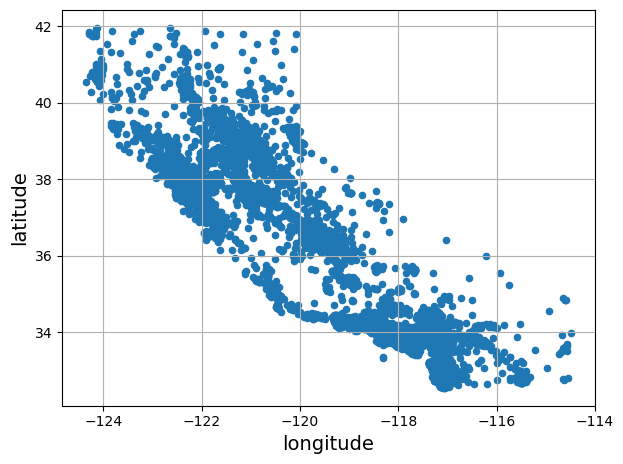

In [30]:

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")
plt.show()

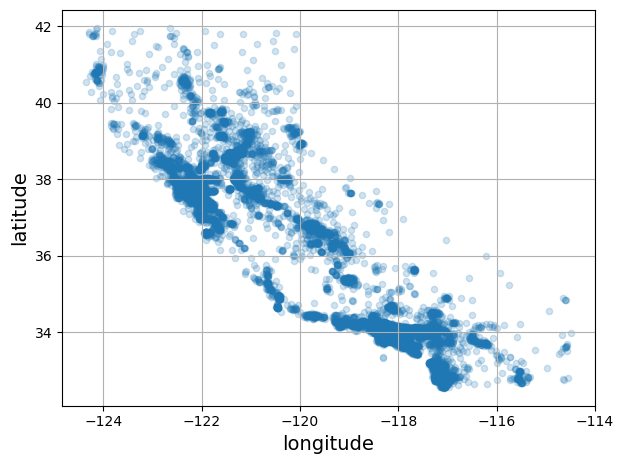

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()